In [1]:
import numpy as np
from scipy.optimize import minimize
from statistics import median

positions = range(0, 6)
data = [1.0, 2.0, 1.5, 3.5, 2.25, 1.75]

In [2]:
def make_model(background, spike_position, spike_flux):
    def f(i):
        distance = abs(i - spike_position)
        height = 0.0
        if distance < 1.0:
            height = (1 - distance) * spike_flux
        return background + height
    return f


In [3]:
def variance(model, data):
    sum = 0.0
    for i in range(len(data)):
        difference = model(i) - data[i]
        sum += difference**2
    return sum
        

In [4]:
def objective_function(model_parameters, data):
    background = model_parameters[0]
    spike_position = model_parameters[1]
    spike_flux = model_parameters[2]
    model = make_model(background, spike_position, spike_flux)
    return variance(model, data)


In [5]:
background0 = median(data)
maximum = max(data)
spike_flux0 = maximum - background0
spike_position0 = data.index(maximum)
x0 = (background0, spike_position0, spike_flux0)

In [6]:
result = minimize(objective_function, x0=x0, args=(data,)).x

In [7]:
background = result[0]
spike_position = result[1]
spike_flux = result[2]

model = make_model(background, spike_position, spike_flux)
values = [model(i) for i in positions]

### Plot the data and the fit

In [8]:
from matplotlib import pyplot as plt

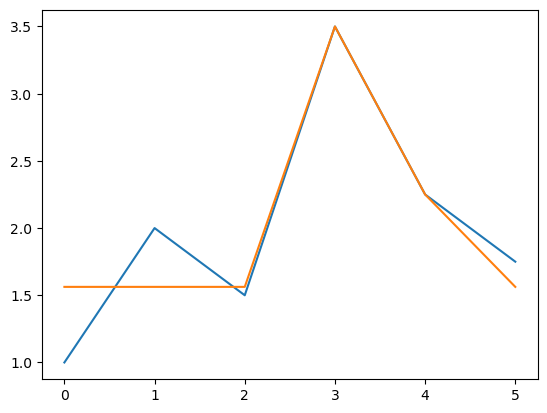

In [9]:
plt.plot(positions, data, positions, values)